In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')

# Test Experiment

In [62]:
results_df = pd.read_csv("../experiments/llama7b/results.csv")
print("Results overview:")
display(results_df)

Results overview:


,experiment,perplexity,final_train_loss,avg_train_loss,total_time,initial_memory_mb,final_memory_mb
0,standard,8.158337,0.162341,0.193080,131.17,1560.93,3166.70
1,activation_aware,8.459724,0.165757,0.173872,49.92,1538.30,17157.84


In [63]:
def load_e2e_latency_memory_data():
    e2e_data = {}
    for exp in ["standard", "activation_aware"]:
        e2e_data[exp] = {}
        try:
            with open(f"../experiments/llama7b/{exp}/e2e_latency_memory.txt", 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if "Total time" in line:
                        total_time = float(line.strip().split(":")[1].strip().split()[0])
                        e2e_data[exp]['total_time'] = total_time
                    elif "Initial memory usage" in line:
                        initial_memory = float(line.strip().split(":")[1].strip().split()[0])
                        e2e_data[exp]['initial_memory'] = initial_memory
                    elif "Final memory usage" in line:
                        final_memory = float(line.strip().split(":")[1].strip().split()[0])
                        e2e_data[exp]['final_memory'] = final_memory
        except FileNotFoundError:
            print(f"Could not load E2E latency and memory data for {exp}")
            e2e_data[exp] = None
    return e2e_data

e2e_data = load_e2e_latency_memory_data()

In [64]:
for exp in ["standard", "activation_aware"]:
    if e2e_data[exp] is not None:
        total_time = e2e_data[exp].get('total_time', None)
        initial_memory = e2e_data[exp].get('initial_memory', None)
        final_memory = e2e_data[exp].get('final_memory', None)
        print(f"{exp.capitalize()} BitDelta:")
        print(f"  Total Time: {total_time:.2f} seconds")
        print(f"  Initial Memory Usage: {initial_memory:.2f} MB")
        print(f"  Final Memory Usage: {final_memory:.2f} MB")
        print(f"  Memory Usage Increase: {final_memory - initial_memory:.2f} MB")
        print()
    else:
        print(f"{exp.capitalize()} - No E2E latency and memory data available.")

Standard BitDelta:
  Total Time: 131.17 seconds
  Initial Memory Usage: 1560.93 MB
  Final Memory Usage: 3166.70 MB
  Memory Usage Increase: 1605.77 MB

Activation_aware BitDelta:
  Total Time: 49.92 seconds
  Initial Memory Usage: 1538.30 MB
  Final Memory Usage: 17157.84 MB
  Memory Usage Increase: 15619.54 MB



/var/tmp/ipykernel_94880/2923548547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experiments, y=times, palette='Blues_d')


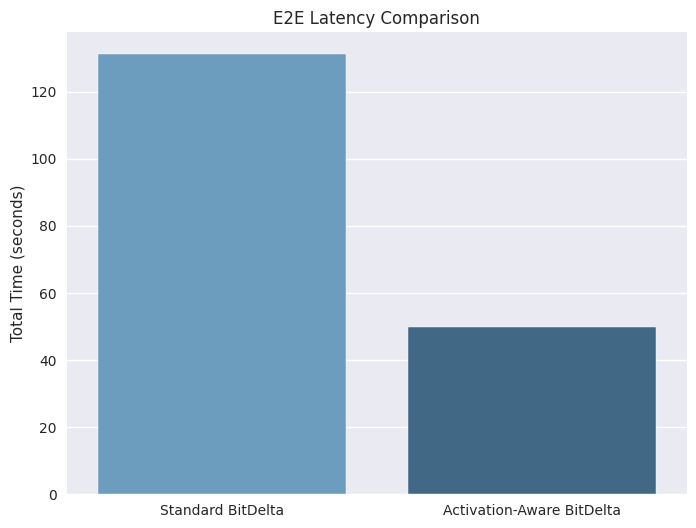

In [65]:
# Prepare data
experiments = ["Standard BitDelta", "Activation-Aware BitDelta"]
times = [e2e_data[exp]['total_time'] for exp in ["standard", "activation_aware"]]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=experiments, y=times, palette='Blues_d')
plt.ylabel('Total Time (seconds)')
plt.title('E2E Latency Comparison')
plt.show()

/var/tmp/ipykernel_94880/1638275348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experiments, y=memory_increase, palette='Greens_d')


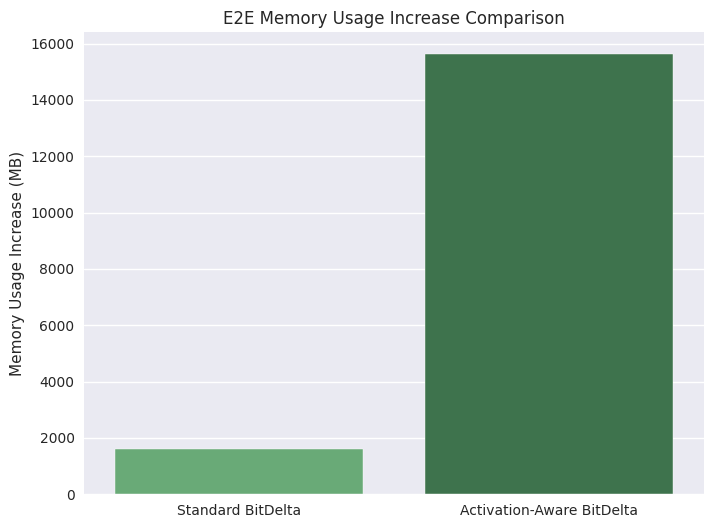

In [66]:
# Prepare data
memory_increase = [
    e2e_data[exp]['final_memory'] - e2e_data[exp]['initial_memory']
    for exp in ["standard", "activation_aware"]
]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=experiments, y=memory_increase, palette='Greens_d')
plt.ylabel('Memory Usage Increase (MB)')
plt.title('E2E Memory Usage Increase Comparison')
plt.show()

In [59]:
def load_latency_memory_data():
    latency_data = {}
    memory_data = {}
    for exp in ["standard", "activation_aware"]:
        try:
            with open(f"../experiments/llama7b/{exp}/latency.json", 'r') as f:
                latency_data[exp] = json.load(f)
        except:
            print(f"Could not load latency data for {exp}")
            latency_data[exp] = None

        try:
            with open(f"../experiments/llama7b/{exp}/memory_usage.json", 'r') as f:
                memory_data[exp] = json.load(f)
        except:
            print(f"Could not load memory usage data for {exp}")
            memory_data[exp] = None
    return latency_data, memory_data

latency_data, memory_data = load_latency_memory_data()

In [60]:
for exp in ["standard", "activation_aware"]:
    print(f"{exp.capitalize()} BitDelta:")
    if latency_data[exp] is not None:
        latency_array = np.array(latency_data[exp])
        avg_latency = np.mean(latency_array)
        std_latency = np.std(latency_array)
        print(f"  Average Training Step Latency: {avg_latency:.2f} ms")
        print(f"  Training Step Latency Std Dev: {std_latency:.2f} ms")
    else:
        print("  No training latency data available.")

    if memory_data[exp] is not None:
        memory_array = np.array(memory_data[exp])
        avg_memory = np.mean(memory_array)
        max_memory = np.max(memory_array)
        print(f"  Average Memory Usage During Training: {avg_memory:.2f} MB")
        print(f"  Max Memory Usage During Training: {max_memory:.2f} MB")
    else:
        print("  No training memory usage data available.")
    print()

Standard BitDelta:
  Average Training Step Latency: 352.39 ms
  Training Step Latency Std Dev: 198.26 ms
  Average Memory Usage During Training: 3189.67 MB
  Max Memory Usage During Training: 3191.00 MB

Activation_aware BitDelta:
  Average Training Step Latency: 347.01 ms
  Training Step Latency Std Dev: 142.95 ms
  Average Memory Usage During Training: 17178.60 MB
  Max Memory Usage During Training: 17180.07 MB



# Latency vs. Batch Size

In [91]:
import os

In [92]:
def extract_metrics(filepath):
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
            time = float(lines[0].split(':')[1].strip().split()[0])
            initial_mem = float(lines[1].split(':')[1].strip().split()[0])
            final_mem = float(lines[2].split(':')[1].strip().split()[0])
            return time, initial_mem, final_mem
    except:
        return np.nan, np.nan, np.nan

In [93]:
base_dir = "../experiments/llama7b_batches"
batch_sizes = [1, 2, 4, 8, 16, 32]

In [109]:
results = []
for batch_size in batch_sizes:
    # Standard
    standard_file = os.path.join(base_dir, f"standard_batch{batch_size}", "e2e_latency_memory.txt")
    time, init_mem, final_mem = extract_metrics(standard_file)
    results.append({
        'experiment': 'Standard',
        'batch_size': batch_size,
        'latency': time if not np.isnan(time) else np.nan,
        'initial_memory': init_mem,
        'final_memory': final_mem
    })
    
    # Activation-aware
    act_file = os.path.join(base_dir, f"activation_aware_batch{batch_size}", "e2e_latency_memory.txt")
    time, init_mem, final_mem = extract_metrics(act_file)
    results.append({
        'experiment': 'Activation-Aware',
        'batch_size': batch_size,
        'latency': time if not np.isnan(time) else np.nan,
        'initial_memory': init_mem,
        'final_memory': final_mem
    })

df = pd.DataFrame(results)

# Print DataFrame to debug
print("DataFrame contents:")
print(df)

DataFrame contents:
          experiment  batch_size  latency  initial_memory  final_memory
0           Standard           1    95.64         1567.82       3176.13
1   Activation-Aware           1    48.25         1588.49      17195.16
2           Standard           2   101.02         1567.18       3956.53
3   Activation-Aware           2    51.48         1569.62      17189.44
4           Standard           4   123.33         1569.72       3192.88
5   Activation-Aware           4    48.13         1576.56      17170.11
6           Standard           8   183.41         1528.45       3181.54
7   Activation-Aware           8    49.16         1525.95      17165.48
8           Standard          16   315.36         1530.76       3180.48
9   Activation-Aware          16    49.32         1524.01      17176.84
10          Standard          32      NaN             NaN           NaN
11  Activation-Aware          32    48.03         1514.77      17154.52


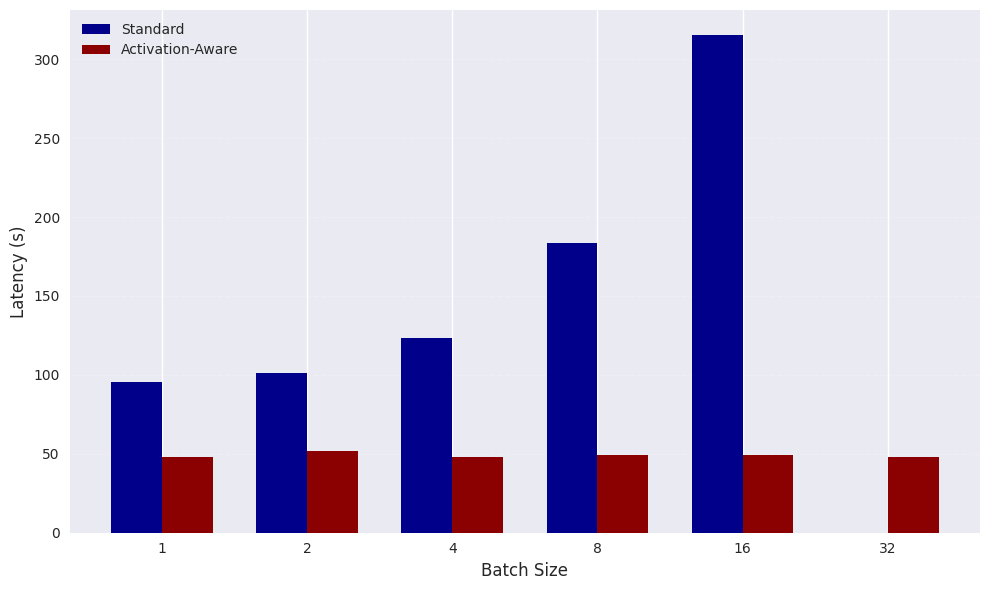

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))

standard_latencies = df[df['experiment'] == 'Standard']['latency'].values
activation_latencies = df[df['experiment'] == 'Activation-Aware']['latency'].values

width = 0.35
x = np.arange(len(batch_sizes))

ax.bar(x - width/2, standard_latencies, width, 
       label='Standard', 
       color='#00008B',  # Dark blue
       edgecolor='none')
ax.bar(x + width/2, activation_latencies, width, 
       label='Activation-Aware', 
       color='#8B0000',  # Dark red
       edgecolor='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_xlabel('Batch Size', fontsize=12)
ax.set_ylabel('Latency (s)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(batch_sizes)
ax.legend(frameon=False)
ax.set_ylim(bottom=0)

ax.grid(axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

# Domain Specific Perplexity/Latency vs Calibration Size

In [126]:
base_dir = "../experiments"
activation_dirs = {
    "agct": os.path.join(base_dir, "llama7b_calibration_agct"),
    "stack": os.path.join(base_dir, "llama7b_calibration_stack"),
    "finance": os.path.join(base_dir, "llama7b_calibration_finance"),
    "wikitext": os.path.join(base_dir, "llama7b_calibration_wikitext"),
}

mapping = {
    "agct": "FremyCompany_AGCT-Dataset",
    "stack": "bigcode_the-stack",
    "finance": "atrost_financial_phrasebank",
    "wikitext": "wikitext"
}
standard_dir = os.path.join(base_dir, "llama7b_standard_domains")
calibration_sizes = [32, 64, 128, 256, 512]

In [127]:
def load_perplexity(path):
    try:
        with open(os.path.join(path, "ppl.txt")) as f:
            return float(f.read().strip())
    except FileNotFoundError:
        return None

In [128]:
results = {}
for domain, dir_path in activation_dirs.items():
    domain_results = {"activation_aware": [], "calibration_sizes": calibration_sizes}
    
    for size in calibration_sizes:
        calib_dir = os.path.join(dir_path, f"calib{size}")
        ppl = load_perplexity(calib_dir)
        domain_results["activation_aware"].append(ppl)
    
    standard_domain_dir = os.path.join(standard_dir, mapping[domain])
    domain_results["standard"] = load_perplexity(standard_domain_dir)
    
    results[domain] = domain_results

4.74267578125


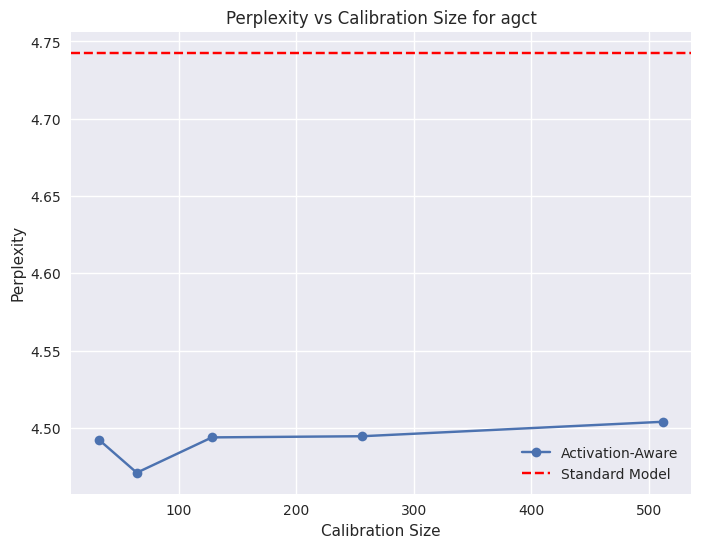

2.583789587020874


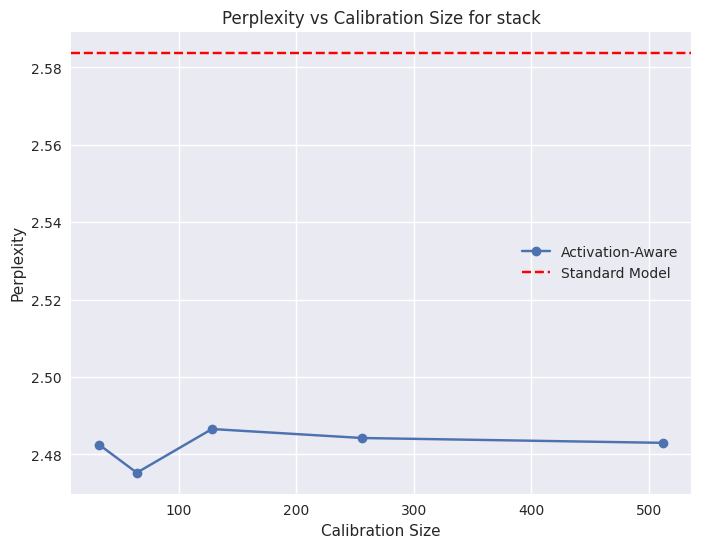

10.315275192260742


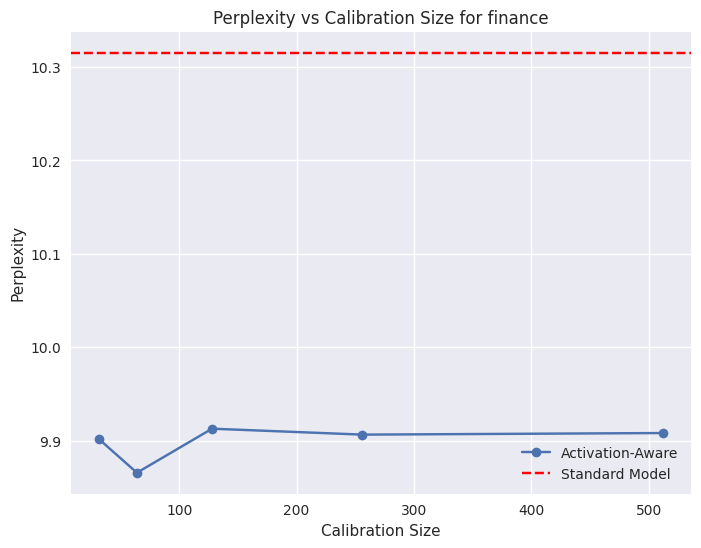

8.158336639404297


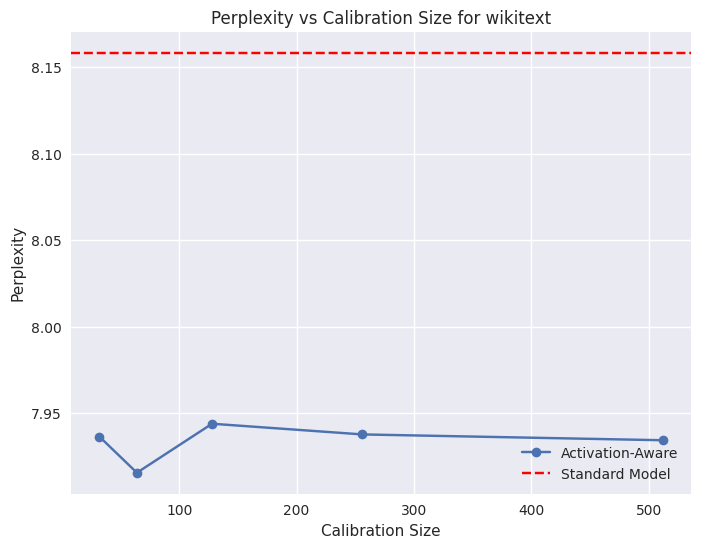

In [129]:
for domain, data in results.items():
    plt.figure(figsize=(8, 6))
    
    plt.plot(
        data["calibration_sizes"], 
        data["activation_aware"], 
        label="Activation-Aware", 
        marker="o"
    )
    
    if data["standard"] is not None:
        print(data['standard'])
        plt.axhline(
            y=data["standard"], 
            color="red", 
            linestyle="--", 
            label="Standard Model"
        )
    
    # Customize plot
    plt.title(f"Perplexity vs Calibration Size for {domain}")
    plt.xlabel("Calibration Size")
    plt.ylabel("Perplexity")
    plt.legend()
    plt.grid(True)
    plt.show()